# Introduction to Data Science
11th January, 2020

Created by [Grishma Jena](https://gjena.github.io) for BITS-Pilani tutorial


## Introduction
EMC [estimates](https://www.emc.com/leadership/digital-universe/2014iview/executive-summary.htm) that by 2020, the digital universe will reach a size of 44 zettabytes or 44 trillion GB. A group of new fields has emerged to be able to deal with this magnitude of data and mine such large data sets.

Data science is a set of methods, processes, heuristics, and algorithms to extract insights from data. A few commonly used applications of Data Science are making customized recommendations (Amazon, Netflix), predicting and forecasting results (Sports leagues, Elections) and finding patterns not easily recognized by humans (Medical imaging).


## Data Science Pipeline

A data science pipeline is a sequence of different steps involved in processing and analyzing data. Given below is a common data science pipeline.

![Data Science Pipeline](http://www.uvm.edu/~cbcafier/assets/pipeline.jpg)



## Question

Start off with a question to be answered. You can either begin with a question and then scrape or search the relevant data or you can begin with the data at hand and think about the different questions you'd want the answers to.

**Identify the stakeholders and formulate the question(s) they are trying to answer.**

## Data

A super important component of Data Science. Without data, there would be no Data Science! Data comes in different shapes, sizes and formats. You can mix and match various sources to get a more complete picture. 

Data is primarily of 3 categories:
- Structured: highly organized, row-column format like databases, CSV files
- Unstructured: no structure like audio, video, documents
- Semi-structured: falls in between, has some semblance of structure like web pages, JSON

Estimates peg the amount of unstructured data to be between 65% to 80% from today till the next 5 years. 

## _Python tool - Numpy_

[NumPy](https://www.numpy.org/) is an important library for scientific computing in Python. NumPy stands for Numerical Python, and provides a high-performance multi-dimensional array object along with tools to work with these arrays. It is quite similar to MATLAB and works with matrices or arrays instead of scalars.

Use conda or pip to install numpy. Further instructions are [here](https://www.scipy.org/install.html).


## _Python tool - Pandas_

[Pandas](http://pandas.pydata.org/) is a foundational tool for performing Data Science in Python. Pandas stands for Python Data Analysis Library and its name is derived from 'panel data'. It is open-source and was originally writen by Wes McKinney. 

Pandas takes in data and converts it to dataframes which are basically tables with rows and columns. It looks quite similar to Excel spreadsheets. Use conda or pip to install pandas. Further instructions are [here](http://pandas.pydata.org/pandas-docs/stable/install.html).

A few different ways to use Pandas:
- Create a Pandas dataframe from a list, a dictionary or a NumPy array
- Open and load a local file into a Pandas dataframe
- Read from a remote database or website

![Pandas meme](https://memegenerator.net/img/instances/51740682/you-are-a-python-lover-if-pandas-doesnt-mean-but-httppandaspydataorg.jpg)




In [3]:
import numpy as np
import pandas as pd
from numpy import nan

# Creating a Pandas dataframe from a list

fibonacci = [0, 1, 1, 2, 3, 5, 8, nan]
fibonacci_pd = pd.DataFrame(fibonacci, columns=['Value'])
fibonacci_pd

,Value
0,0.0
1,1.0
2,1.0
3,2.0
4,3.0
5,5.0
6,8.0
7,NaN


### Fetching and loading data

There are a couple ways to get the data. 

#### Countries dataset

In [4]:
# Create a Pandas dataframe from a CSV file

url = 'https://raw.githubusercontent.com/cs109/2014_data/master/countries.csv'
countries = pd.read_csv(url)
print('Dimensions are ', countries.shape)
print('Metadata ', countries.info())
countries.head(5)

Dimensions are  (194, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 2 columns):
Country    194 non-null object
Region     194 non-null object
dtypes: object(2)
memory usage: 3.1+ KB
Metadata  None


,Country,Region
0,Algeria,AFRICA
1,Angola,AFRICA
2,Benin,AFRICA
3,Botswana,AFRICA
4,Burkina,AFRICA


In [54]:
# print(len(countries['Country']))
# print(countries.iloc[0][0])
# print(countries[countries['Region'] == 'NORTH AMERICA'])
print(countries.groupby('Region').count())

               Country
Region                
AFRICA              54
ASIA                44
EUROPE              47
NORTH AMERICA       23
OCEANIA             14
SOUTH AMERICA       12


#### Iris dataset from sklearn
A list of other datasets present in sklearn is [here](https://scikit-learn.org/stable/datasets/index.html).

In [4]:
# Toy dataset from sklearn stands for Scikit learn
from sklearn.datasets import load_iris

iris = load_iris()
iris_data = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                         columns= iris['feature_names'] + ['target'])
iris_data.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


## Data cleaning and wrangling

Real-world data is often messy. Data wrangling refers to the process of gathering, selecting, and transforming to make the data useful. It includes:

- _Standardize multiple sources:_ A dataset with surveys including geographical information might have someone write CA, while others write California.
- _Scaling features:_ Scale and normalize the features to standardize the data. 
- _Discard or interpolate/replace incomplete or missing or inaccurate values_: If your dataset is large, you can afford to lose incomplete data points by discarding them completely. Otherwise, interpolate or replace the missing values using a statistic like mean, median, zero, etc.
- _Discard irrelevant values_: Sometimes the data might include features irrelevant to the question you are trying to answer. Feel free to discard them. You can always come back and include it if you later realize the feature holds important information.
- _Convert categories to numbers:_ Often there might be different categories in your dataset. For example, 'spam' and 'not spam' emails. Convert spam to 1 and not spam to 0.
- _Deduplicate records:_ Get rid of duplicate records so models aren't biased because of the weightage on majorly occuring data points.

![Wrangle](https://media.giphy.com/media/l1Et5xf5WVfnarazS/giphy.gif)
<center><i> Sandy realizes the importance of needing to wrangle these (data) critters. </i></center>


In [55]:
# print(fibonacci_pd.isna().sum())
# print(fibonacci_pd.isna())
print(fibonacci_pd.isnull().sum())
print(fibonacci_pd.isnull())

Value    1
dtype: int64


In [6]:
fibonacci_pd.fillna(fibonacci_pd.mean()) # Replace all NA values with the mean

,Value
0,0.000000
1,1.000000
2,1.000000
3,2.000000
4,3.000000
5,5.000000
6,8.000000
7,2.857143


In [7]:
fibonacci_pd.dropna(inplace=True) # Discarding all NA values
fibonacci_pd

,Value
0,0.0
1,1.0
2,1.0
3,2.0
4,3.0
5,5.0
6,8.0


In [8]:
print(countries['Region'].unique())
countries['Region_category'] = countries['Region']
mapping = {'AFRICA': 1, 'ASIA': 2, 'EUROPE': 3, 'NORTH AMERICA': 4, 'OCEANIA': 5,
       'SOUTH AMERICA': 6}
countries.replace({'Region_category': mapping}, inplace=True) # Converting string categories to integer
countries.tail(5)

['AFRICA' 'ASIA' 'EUROPE' 'NORTH AMERICA' 'OCEANIA' 'SOUTH AMERICA']


,Country,Region,Region_category
189,Paraguay,SOUTH AMERICA,6
190,Peru,SOUTH AMERICA,6
191,Suriname,SOUTH AMERICA,6
192,Uruguay,SOUTH AMERICA,6
193,Venezuela,SOUTH AMERICA,6


## Data exploration

Data exploration or Exploratory Data Analysis (EDA) is an initial investigation of the data. It involves extracting important variables and summarizing characteristics.

![Getting feet wet](https://media.giphy.com/media/2vmKb6GjMmb1Vx5gow/giphy.gif)
<center> <i> Think of it as getting your feet wet with the data. </i> </center>

A lot of data visualization is used here. One of the most popular libraries for plotting graphs is `matplotlib`. By the end of this step, you would have ideally uncovered initial points of interest and formed hypotheses.

## _Python tool: Matplotlib_

[Matplotlib](https://matplotlib.org/) is a popular Python 2D plotting library. Use `pyplot` module for simple plotting similar to a MATLAB interface. Use the installation guide [here](https://matplotlib.org/users/installing.html).

          Value
count  7.000000
mean   2.857143
std    2.794553
min    0.000000
25%    1.000000
50%    2.000000
75%    4.000000
max    8.000000


Text(0, 0.5, 'Value')

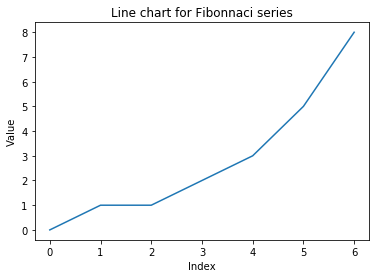

In [5]:
from matplotlib import pyplot as plt

# print(fibonacci_pd.columns)
# print(fibonacci_pd.dtypes)
print(fibonacci_pd.describe())

%matplotlib inline
plt.plot(fibonacci_pd)
plt.title('Line chart for Fibonnaci series')
plt.xlabel('Index')
plt.ylabel('Value')

AFRICA           54
EUROPE           47
ASIA             44
NORTH AMERICA    23
OCEANIA          14
SOUTH AMERICA    12
Name: Region, dtype: int64


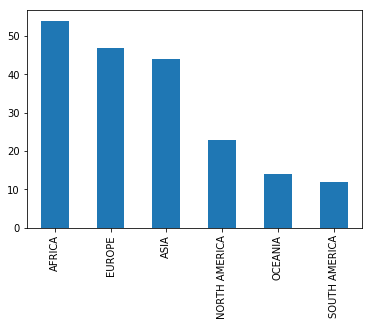

In [10]:
print(countries['Region'].value_counts())
countries.Region.value_counts().plot(kind='bar')

## _Python tool: Seaborn_

[Seaborn](https://seaborn.pydata.org/) is a statistical data visualization library based on Matplotlib. It is used for drawing aesthetic and informative statistical graphs. Use the installation guide [here](https://seaborn.pydata.org/installing.html#installing).

## Model building

After all that hard working of getting the data, wrangling and exploring it, comes what is considered as the 
meaty part - creating the models.

The process of model building starts off with _feature engineering_ i.e. selecting the important features and constructing more meaningful features. Expertise in the domain in question is always helpful. Look at the question and the kind of output expected to understand what kind of algorithm is needed. 

### Splitting the data into training and testing

Take the clean and well-formatted data and divide it into two sets : training and test. Common ratios are 70:30 or 80:20 train-test split. Use `train_test_split` from `sklearn.model_selection`.

![Exam](https://media.giphy.com/media/8dYmJ6Buo3lYY/giphy.gif)
<center> <i> Think of training data as homework to teach and learn and testing data as a test or exam to evaluate performance. </i> </center>


## _Python tool: Sklearn_

[Sklearn](https://scikit-learn.org/stable/) is a free Machine learning library. It includes different algorithms for creating models for classification, regression, clustering and works with NumPy and SciPy. Installation guide is [here](https://scikit-learn.org/stable/install.html).


![Approaches](http://i.imgur.com/a69NtFM.jpg)

The two main types of Machine learning approaches are Supervised learning and Unsupervised learning.

### Supervised learning

This approach is used when there are labels associated with the data i.e. there is an output variable which is the 
correct answer. The focus is on finding the mapping function from the input to the output to allow the model to make
correct predictions. Examples include classification and regression.

## Classification - Identifying malignant breast cancer 
This falls in the category of Supervised learning as there are labels (benign/malignant) associated with the data. 
The dataset from UCI ML repository contains characteristics derived from images of cell nuclei for solid breast masses. More information about it can be found [here](http://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+%28diagnostic%29). <br> 
Demo adapted from [this](https://towardsdatascience.com/building-a-simple-machine-learning-model-on-breast-cancer-data-eca4b3b99fa3) and [this](https://colab.research.google.com/drive/1YfZJ0MGQUhdplI06uvtnUwmPJsIxkOYM#scrollTo=HlAbyAhV1hkM).

### Question - Given characterists for a breast mass, can we predict if it is malignant or benign?

#### Breast cancer dataset from sklearn

In [11]:
from sklearn.datasets import load_breast_cancer

raw_data = load_breast_cancer()
tumor_data = pd.DataFrame(raw_data.data, raw_data.target, columns=raw_data.feature_names) # Converting to Pandas df
tumor_data['label'] = raw_data.target
tumor_data.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [12]:
print('Features present:', tumor_data.columns)

Features present: Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'label'],
      dtype='object')


### Data wrangling and exploration 

Dimensions of data: (569, 31)


Text(0.5, 1.0, 'Distribution of Malignant and Benign masses')

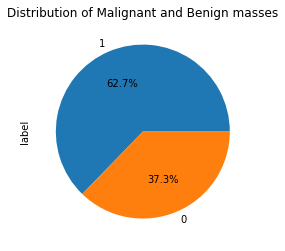

In [13]:
print('Dimensions of data:', tumor_data.shape)
%matplotlib inline
tumor_data.label.value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Malignant and Benign masses')

In [14]:
bins = 10
malignant_data = tumor_data[tumor_data.label == 1]
benign_data = tumor_data[tumor_data.label == 0]

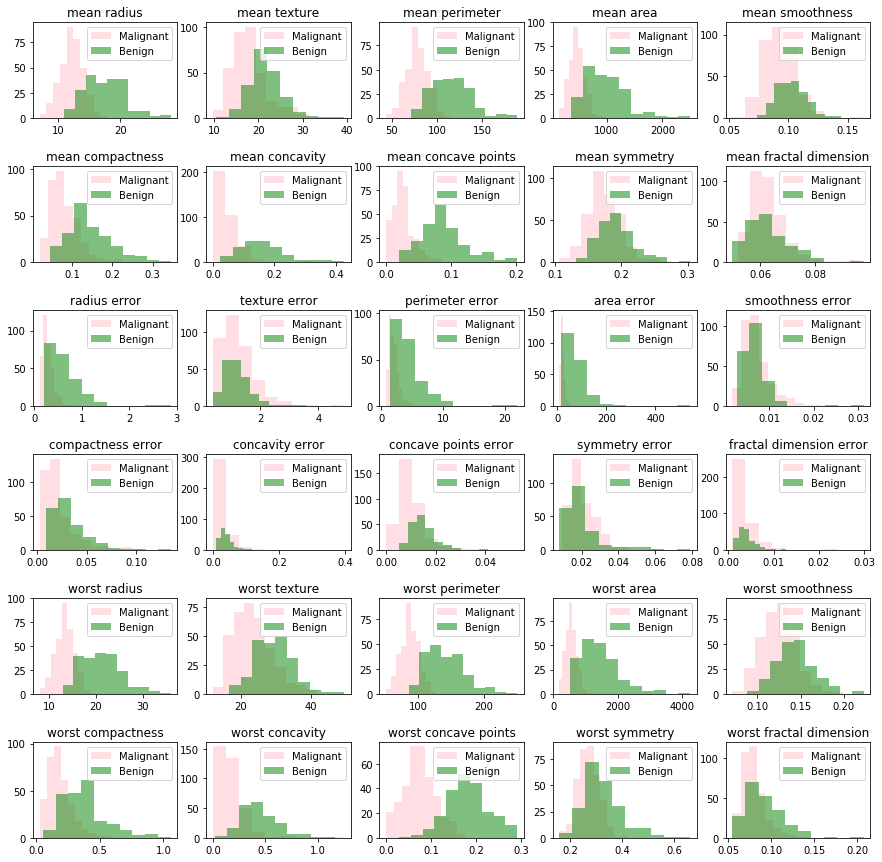

In [15]:
from matplotlib import pyplot

fig, ax = plt.subplots(nrows=6, ncols=5, figsize=(15, 15))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.5)
idx = 0

for x_i in range(0, 6):
    for y_i in range(0, 5):
        ax[x_i, y_i].hist(malignant_data.iloc[:,idx], bins, alpha=0.5, label='Malignant', color='pink')
        ax[x_i, y_i].hist(benign_data.iloc[:,idx], bins, alpha=0.5, label='Benign', color='green')
        ax[x_i, y_i].legend(loc='upper right')
        ax[x_i,y_i].set_title(tumor_data.columns[idx])
        idx += 1

In [16]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X = tumor_data.iloc[:, 0:-1]
Y = tumor_data.iloc[:, -1]
print('Scaled features')
X = sc.fit_transform(X)
X

Scaled features


array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

### Model building

In [17]:
from sklearn.model_selection import train_test_split

print('Splitting the data into training and test sets')
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
print('Training set:', X_train.shape)
print('Testing set:', X_test.shape)

Splitting the data into training and test sets
Training set: (455, 30)
Testing set: (114, 30)


In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

clf = DecisionTreeClassifier()
print('Training a Decision Tree classifier on the training data')
clf.fit(X_train, Y_train)

Training a Decision Tree classifier on the training data


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

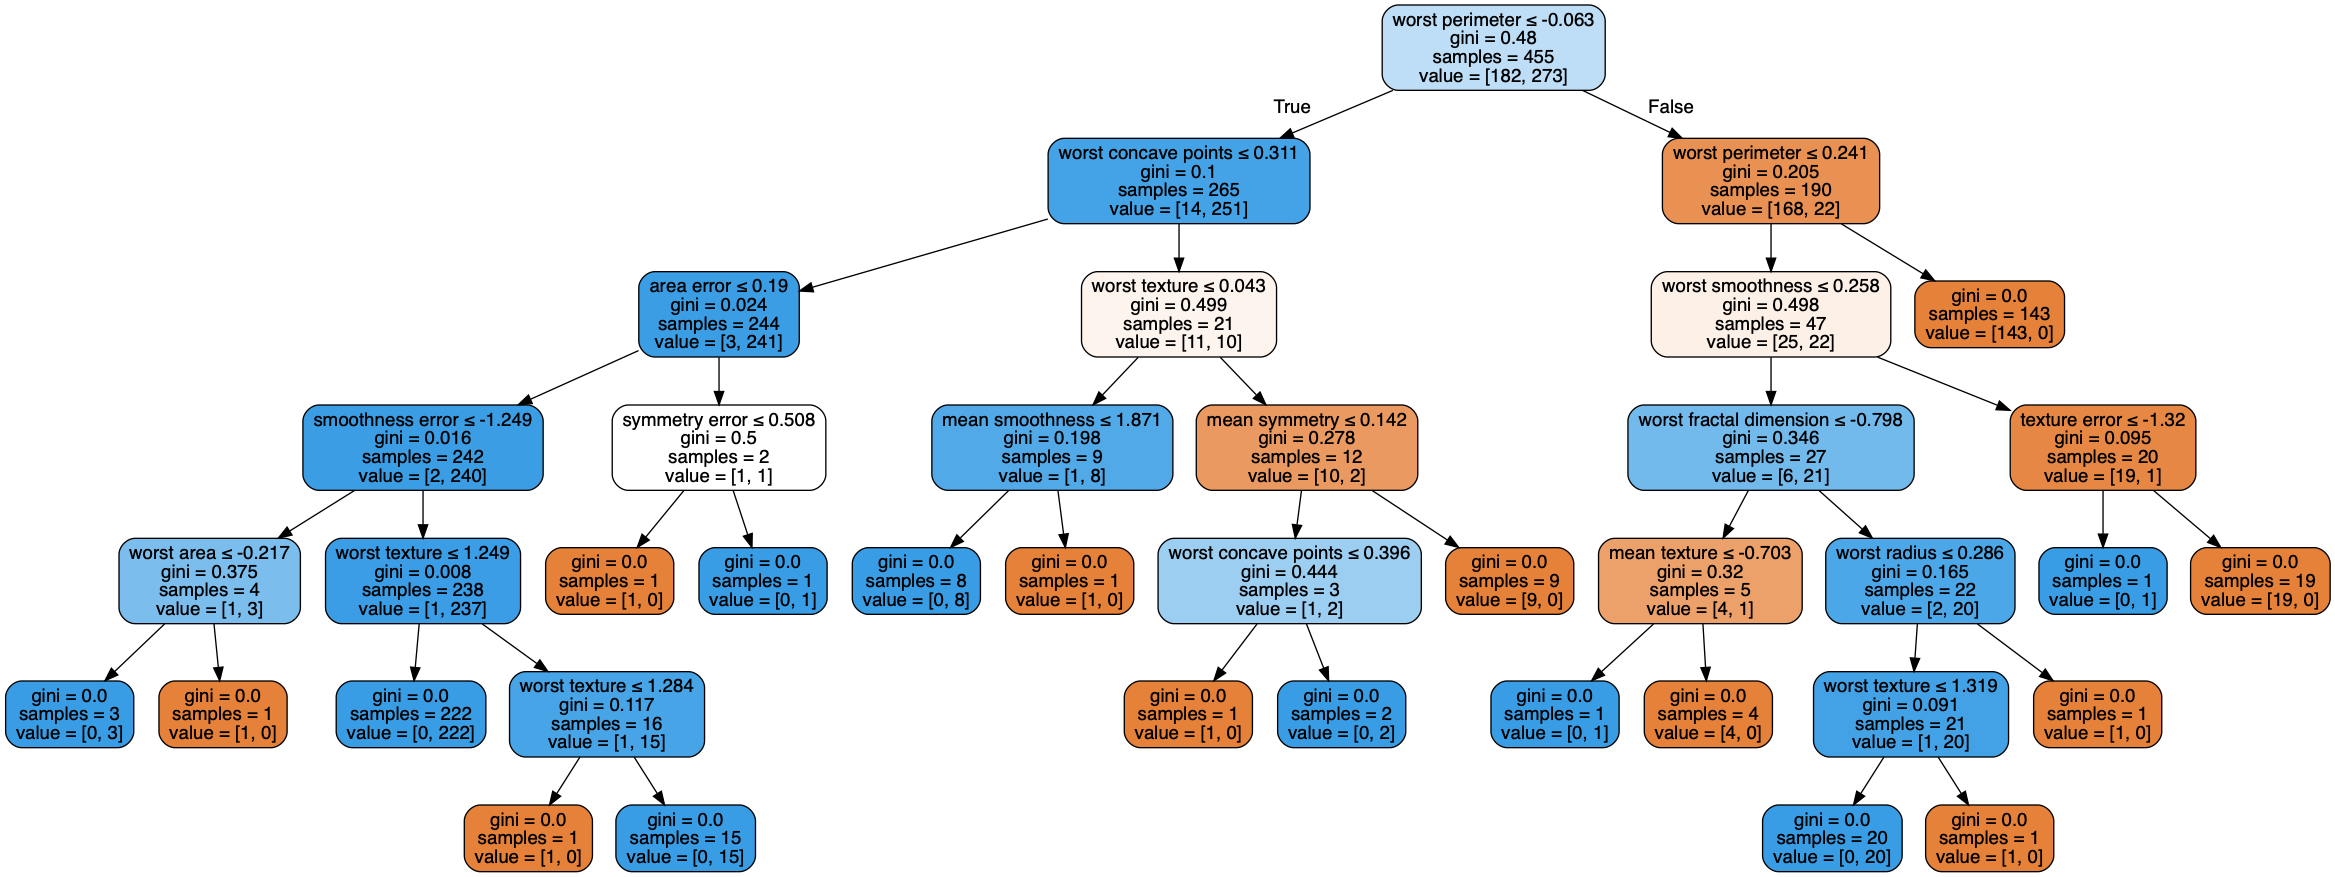

In [19]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, filled=True, rounded=True, 
                special_characters=True, feature_names=tumor_data.columns[:-1])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## Model Evaluation


### Testing the model
*Precision* is the fraction of information retrieved that is relevant i.e. of all patients we predicted have cancer, what fraction of them actually have cancer?

*Recall* is the fraction of relevant information that are retrieved i.e. of all patients in the set that actually have cancer, what fraction did we correctly detect?

In the classification report, the reported averages include micro average (averaging the total true positives, false negatives and false positives), macro average (averaging the unweighted mean per label), weighted average (averaging the support-weighted mean per label).

*Confusion matrix*
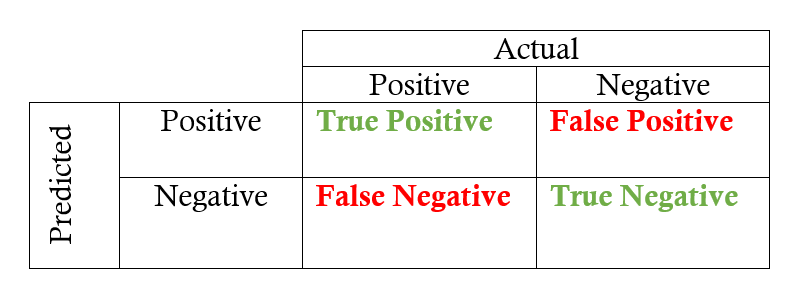

Precision = True positive / Number of predicted positive = TP / (TP +FP)

Recall = True positive / Number of actual positive = TP / (TP + FN)

In [20]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
Y_pred = clf.predict(X_test)
print('Accuracy: {:.3f}'.format(accuracy_score(Y_test, Y_pred)))
print(classification_report(Y_test, Y_pred))

Accuracy: 0.947
              precision    recall  f1-score   support

           0       0.83      1.00      0.91        30
           1       1.00      0.93      0.96        84

   micro avg       0.95      0.95      0.95       114
   macro avg       0.92      0.96      0.94       114
weighted avg       0.96      0.95      0.95       114



## Data visualization



Text(0.5, 15.0, 'Predicted Class')

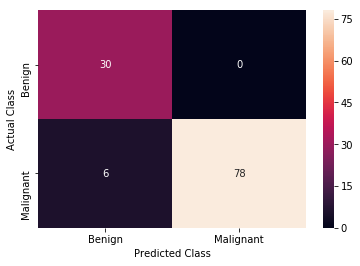

In [24]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(Y_test, Y_pred)
sns.heatmap(conf_mat, annot = True, fmt = '.0f', 
        xticklabels = ['Benign', 'Malignant'], yticklabels = ['Benign', 'Malignant'])
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')

## Data storytelling

Tell a story with data, explain the whys.


### The current model is able to predict malignant or benign masses with 90% accuracy

## Regression - predicting housing prices

### Question - given characteristics of houses, can we predict the price?
#### Boston housing data

In [25]:
from sklearn.datasets import load_boston
import pandas as pd
from matplotlib import pyplot as plt

boston_dataset = load_boston()
print(boston_dataset.keys())
housing_data = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
print('Dimensions are ', housing_data.shape)
housing_data.head(5)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
Dimensions are  (506, 13)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [26]:
boston_dataset.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [27]:
housing_data['PRICE'] = boston_dataset.target
housing_data.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Data wrangling and exploration

In [28]:
print(housing_data.isna().sum())
print(housing_data.isnull().sum())

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64


In [29]:
print(housing_data.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

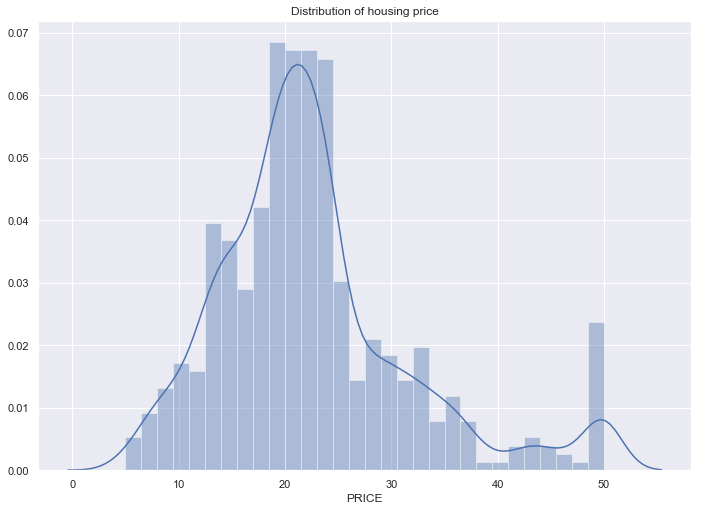

In [30]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.distplot(housing_data['PRICE'], bins=30)
plt.title('Distribution of housing price')
plt.show()

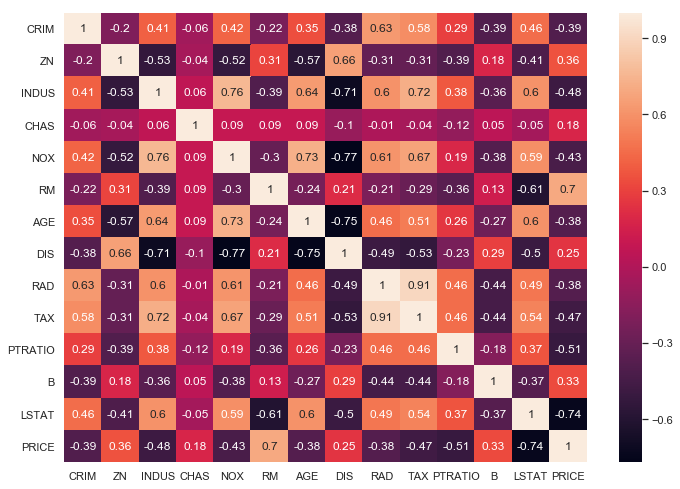

In [31]:
correlation_matrix = housing_data.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

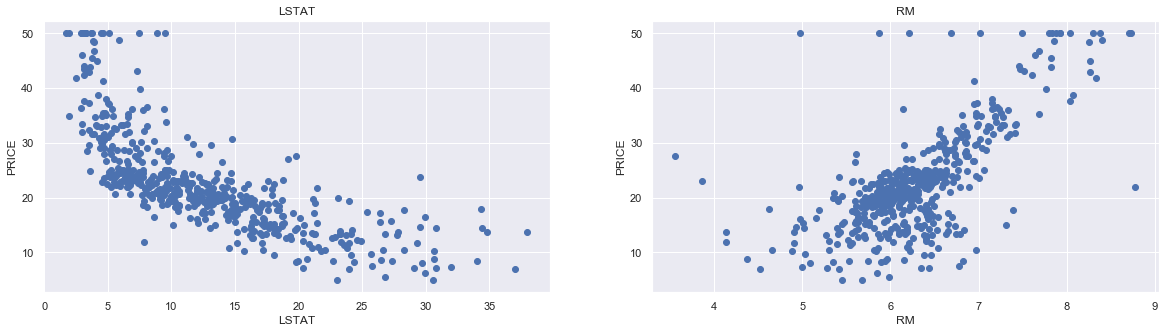

In [32]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = housing_data['PRICE']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = housing_data[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('PRICE')

### Model building

In [33]:
X = housing_data.drop("PRICE", axis=1)
Y = housing_data["PRICE"]
print(X.shape)
print(Y.shape)

(506, 13)
(506,)


In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
scaled_X = scaler.transform(X)

In [35]:
from sklearn.model_selection import train_test_split

seed = 9
test_size = 0.20

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = test_size, random_state = seed)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

rgr = LinearRegression()
rgr.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [37]:
# model evaluation for training set
import numpy as np

y_train_predict = rgr.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")


The model performance for training set
--------------------------------------
RMSE is 4.645204312132807
R2 score is 0.7308959980158387




In [38]:
# model evaluation for testing set
y_test_predict = rgr.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
RMSE is 4.865862747837355
R2 score is 0.766011157490401


### Unsupervised learning

This approach is used when there are no labels available for the data i.e. there are no correct answers.
It is used mainly to find the inherent structure present within. The focus of the algorithms is to learn the 
underlying data structure. Examples include clustering and association.

![Unsupervised](https://media.giphy.com/media/3orieYz7CpCMVjSTUQ/giphy.gif)

## Clustering
A type of Unsupervised learning as there are no labels associated with the data. It is used to find the inherent structure within data. Adapted from https://towardsdatascience.com/an-introduction-to-clustering-algorithms-in-python-123438574097

## K Means algorithm

In [39]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

data = make_blobs(n_samples=200, n_features=2, centers=5, cluster_std=1.6, random_state=50)
points = data[0]
points

array([[-2.77244011e+00,  6.46273998e+00],
       [-5.01209756e-01, -3.66534438e+00],
       [ 4.80932238e+00, -5.70149469e+00],
       [-1.65143884e+00,  6.38316168e+00],
       [-3.03519149e+00,  1.07139036e+01],
       [ 1.09766760e+00, -4.85679456e+00],
       [-7.91429107e-02,  5.52285176e+00],
       [-7.67542214e-01, -5.69548201e+00],
       [-5.47121129e+00, -6.18687342e+00],
       [-3.36134363e+00,  8.22083113e+00],
       [-3.94237940e+00,  9.82816286e+00],
       [-4.82361594e-01,  6.51947157e+00],
       [-3.63618643e+00, -4.01910949e+00],
       [-5.10916044e+00, -4.59492642e+00],
       [-5.15417920e+00, -4.12796457e+00],
       [-5.00817726e+00,  1.01801769e+01],
       [-2.15083399e+00,  4.02959850e+00],
       [-5.23835667e-01,  7.48498444e+00],
       [-6.10691421e+00, -5.98494706e+00],
       [-3.99861134e+00,  1.21240514e+01],
       [-6.65058496e+00, -2.11819191e+00],
       [-2.23331822e+00,  3.02152355e+00],
       [-1.36304582e+00,  5.23782367e+00],
       [-5.

(-15, 15)

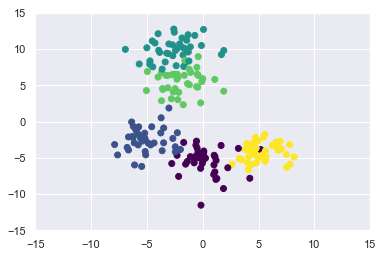

In [40]:
%matplotlib inline
plt.scatter(data[0][:,0], data[0][:,1], c=data[1], cmap='viridis')
plt.xlim(-15,15)
plt.ylim(-15,15)

In [41]:
from sklearn.cluster import KMeans
colors = ['red', 'green', 'blue', 'yellow', 'purple', 'pink', 'orange', 'cyan']

k = 8
kmeans = KMeans(n_clusters=k)
kmeans.fit(points)
print('Cluster centers:\n', kmeans.cluster_centers_)

Cluster centers:
 [[-4.29317312  8.67136871]
 [-0.62338048 -4.72129908]
 [-5.36149469 -2.58559824]
 [-1.31655683  6.40962702]
 [ 1.85438762 -7.59577408]
 [-2.85955809  3.35326077]
 [ 5.34160372 -4.12702214]
 [-1.42673133 10.73715292]]


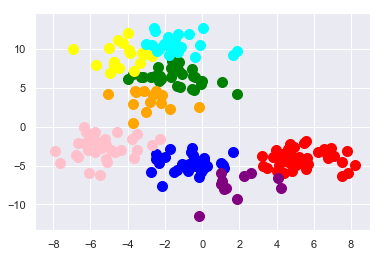

In [42]:
Y_pred = kmeans.fit_predict(points)

for idx in range(0, k):
    plt.scatter(points[Y_pred == idx, 0], points[Y_pred == idx, 1], s=100, c=colors[idx])

## Clustering for Topic Modeling - Identifying topics in text

Topic modeling is an unsupervised ML method. Used to find inherent structure in documents. Use it to learn
representations of topics in different documents. Can also be used to group different documents together. We will
use ```Gensim``` library and Latent Dirichlet Allocation for this.

LDA’s approach to topic modeling is it considers each document as a collection of topics in a certain proportion. And each topic as a collection of keywords, again, in a certain proportion.

Once you provide the algorithm with the number of topics, all it does it to rearrange the topics distribution within the documents and keywords distribution within the topics to obtain a good composition of topic-keywords distribution.

Adapted from https://kleiber.me/blog/2017/07/22/tutorial-lda-wikipedia/

In [10]:
import wikipedia
import random

def fetch_data():
    wikipedia_random_articles = wikipedia.random(2)
    print(wikipedia_random_articles)
    wikipedia_random_articles.extend(['Biryani', 'Hyderabad pearl', 'Charminar', 'Telangana', 'Hyderabad'])
    wikipedia_random_articles
    print(wikipedia_random_articles)
    
    wikipedia_articles = []
    for wikipedia_article in wikipedia_random_articles:
        wikipedia_articles.append([wikipedia_article, 
                                   wikipedia.page(wikipedia_article).content])
    return wikipedia_articles
fetch_data()

['Poème électronique', 'Rita Peri']
['Poème électronique', 'Rita Peri', 'Biryani', 'Hyderabad pearl', 'Charminar', 'Telangana', 'Hyderabad']


[['Poème électronique',
  'Poème électronique (English Translation: "Electronic Poem") is an 8-minute piece of electronic music by composer Edgard Varèse, written for the Philips Pavilion at the 1958 Brussels World’s Fair. The Philips corporation commissioned Le Corbusier to design the pavilion, which was intended as a showcase of their engineering progress. Le Corbusier came up with the title Poème électronique, saying he wanted to create a "poem in a bottle". Varèse composed the piece with the intention of creating a liberation between sounds and as a result uses noises not usually considered "musical" throughout the piece.\n\n\n== Original performance ==\n\nThe pavilion was shaped like a stomach, with a narrow entrance and exit on either side of a large central space. As the audience entered and exited the pavilion, the electronic composition Concret PH by  Iannis Xenakis (who also acted as Le Corbusier\'s architectural assistant for the pavilion\'s design) was heard. Poème électron

In [11]:
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

def clean(article):
    title, document = article
    tokens = RegexpTokenizer(r'\w+').tokenize(document.lower())
    tokens_clean = [token for token in tokens if token not in 
                    stopwords.words('english')]
    tokens_stemmed = [PorterStemmer().stem(token) for token 
                      in tokens_clean]
    return (title, tokens_stemmed)

In [45]:
from gensim import corpora, models
import gensim

wikipedia_articles = fetch_data()
wikipedia_articles
wikipedia_articles_clean = list(map(clean, wikipedia_articles))

article_contents = [article[1] for article in wikipedia_articles_clean]
dictionary = corpora.Dictionary(article_contents)
corpus = [dictionary.doc2bow(article) for article in 
          article_contents[:-1]] # All except 'Hyderabad'

['GDP-fucose transporter 1', 'Turbonilla mataderorum', 'Biryani', 'Hyderabad pearl', 'Charminar', 'Telangana', 'Hyderabad']


In [46]:
lda_model = gensim.models.ldamodel.LdaModel(corpus, num_topics=6, 
                                            id2word = dictionary, 
                                            passes=100)

topic_results = lda_model.print_topics(num_topics=6, num_words=5)

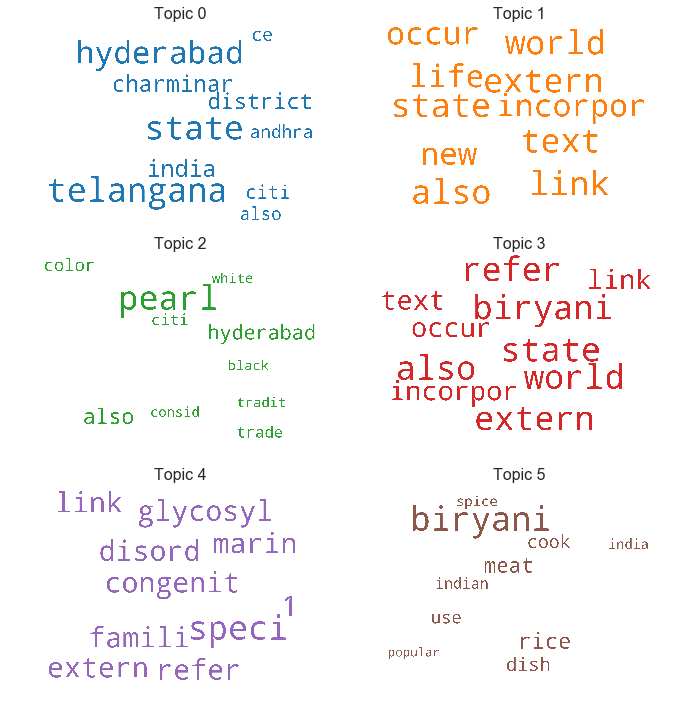

In [47]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(3, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

In [48]:
from operator import itemgetter

similarity = list(lda_model[[dictionary.doc2bow(article_contents[-1])]])
print('Similarity to each of the topics:', similarity[0])
match = max(similarity[0], key=itemgetter(1))
print('Given topic is most similar to topic', match[0], ' with a similarity of', match[1])

Similarity to each of the topics: [(0, 0.7590764), (1, 0.03439959), (2, 0.067865804), (3, 0.04272074), (4, 0.02715195), (5, 0.06878545)]
Given topic is most similar to topic 0  with a similarity of 0.7590764


### Semi-supervised learning

This sits in the middle of the spectrum, between supervised and unsupervised learning. Quite a lot of real-world
problems fit in this category. Think of it as knowing a few answers, but not all. For example, consider a repository
of images. Some of those might have captions (labeled) while the others wouldn't (unlabeled).

Supervised learning could be used to train the model with labeled examples and used to find labels for those that 
don't have them. Unsupervised learning could be used to find groups or structure within the data.


### Reinforcement learning

Yet another type of learning is Reinforcement learning which is quite similar to how humans behave. Agents are in a goal-oriented enviroment where certain actions are desirable and others digress from meeting the objective. Depending
on the actions an agent takes, it is given a reward or a penalty. Famous examples include teaching a robot to flip pancakes, to walk and to play [video games](https://www.youtube.com/watch?v=V1eYniJ0Rnk).

![RL](https://media.giphy.com/media/bsBrYepOYSebe/giphy.gif)



## Resources

- https://www.kaggle.com/mjbahmani/20-ml-algorithms-15-plot-for-beginners
- [A quick intro to Pandas](https://towardsdatascience.com/a-quick-introduction-to-the-pandas-python-library-f1b678f34673)
- [Numerical Python Pandas](https://www.python-course.eu/pandas.php)
- [Dataquest tutorial](https://www.dataquest.io/blog/pandas-python-tutorial/)
- [Beginner's Pandas tutorial](https://stackabuse.com/beginners-tutorial-on-the-pandas-python-library/)
- https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644b48a
- https://www.nugit.co/what-is-data-storytelling/
- https://gogul09.github.io/software/regression-example-boston-housing-prices

## Contact info

gjena.github.io
@DebateLover
linkedin.com/in/grishmajena
